# Glassdoor scrape

via this script I aim to scrape reported salaries from glassdoor for a specific role in a specific city

#### test - Android Developer Boston

In [ ]:
import urllib
import json
import numpy as np
import matplotlib.pyplot as plt
url = 'https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggest\
Chosen=false&clickSource=searchBtn&typedKeyword=\
Android+Developer&sc.keyword=Android+Developer&locT=C&locId=1154532&jobType='
headers = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36' }
data=bytes(json.dumps(headers), encoding="utf-8")
req = urllib.request.Request(url, data, headers)
with urllib.request.urlopen(req) as response:
    the_page = response.read()
print(urllib.request.urlopen(req))


In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(the_page, 'html.parser')
soup.find_all("i", class_="info infoSalEst margLtSm")
tag = soup.find_all(attrs={"data-displayed-max-salary": True})

min_sal = np.zeros(0)
for obj in soup.find_all('i', class_="info infoSalEst margLtSm"):
    print(obj.get("data-displayed-min-salary"))
    min_sal = np.append(min_sal,float(obj.get("data-displayed-min-salary")))

print(min_sal)

In [ ]:

plt.hist(min_sal)
plt.show()

unfortunately, glassdoor.com does not report estimated salaries for all roles, therefore we need to scrape the 'Salaries' section of Glassdoor

#### Data Scientist London

In [ ]:
import urllib
import json
import numpy as np
import matplotlib.pyplot as plt

#specify URL - should be automated
url = 'https://www.glassdoor.co.uk/Salaries/london-data-scientist-salary-SRCH_IL.\
0,6_IM1035_KO7,21.htm'

#standard python user agent is blocked
headers = { 'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36' }
data=bytes(json.dumps(headers), encoding="utf-8")
req = urllib.request.Request(url, data, headers)
with urllib.request.urlopen(req) as response:
    the_page = response.read()
print(urllib.request.urlopen(req))


In [177]:
from bs4 import BeautifulSoup
#use beatiful soup for parsing
soup = BeautifulSoup(the_page, 'html.parser')

#obtain min and max salaries
min_sal = np.zeros(0)
for obj in soup.find_all("div", class_="minor cell alignLt minPay"):
     min_sal = np.append(min_sal, obj.text)
        
max_sal = np.zeros(0)
for maxobj in soup.find_all("div", class_="minor cell alignRt maxPay"):
     max_sal = np.append(max_sal, maxobj.text)

#convert into numbers
min_sal = np.char.replace(min_sal, 'k', '000')
min_sal = np.char.replace(min_sal, '£', '')
max_sal = np.char.replace(max_sal, 'k', '000')
max_sal = np.char.replace(max_sal, '£', '')

min_sal = min_sal.astype(int)
max_sal = max_sal.astype(int)
     
salaries = np.zeros((min_sal.shape[0], 3))
salaries[:,0] = min_sal
salaries[:,1] = max_sal
salaries = salaries[salaries[:, 0].argsort()]
salaries[:,2] = range(max_sal.shape[0])




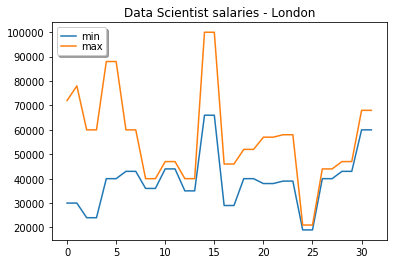

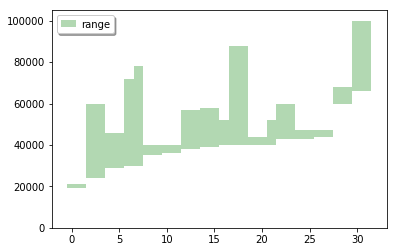

In [183]:
#plot
plt.plot(min_sal)
plt.plot(max_sal)
plt.legend(['min', 'max'], ncol=1, loc='upper left', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.5, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('Data Scientist salaries - London')
plt.show()
plt.clf()
plt.bar(x = salaries[:,2], height = salaries[:,1], width = 1, color = 'green', alpha = 0.3)
plt.bar(x = salaries[:,2], height = salaries[:,0], width = 1, color = 'white')
plt.legend(['range'], ncol=1, loc='upper left', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.5, handlelength=1.5,
           fancybox=True, shadow=True)
plt.show()